#### Question:
2.	Compute ACF of moving average model.
3.	Compute PACF of autoregression model.

#### Answer:
ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band and tada! We have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.

PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features.

In [1]:
from IPython.display import Image

In [2]:
Image(url= "ACF.png")

In [3]:
Image(url= "PACF.png")

### 1/ Auto regressive (AR) process 

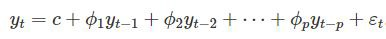

In [11]:
Image('ar.jpeg')

Where ϵt is a white noise and y’t-₁ and y’t-₂ are the lags. Order p is the lag value after which PACF plot crosses the upper confidence interval for the first time. These p lags will act as our features while forecasting the AR time series

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf

In [5]:
t = np.linspace(0, 10, 500)
#normal distributed values
ys = np.random.normal(0,5,500)

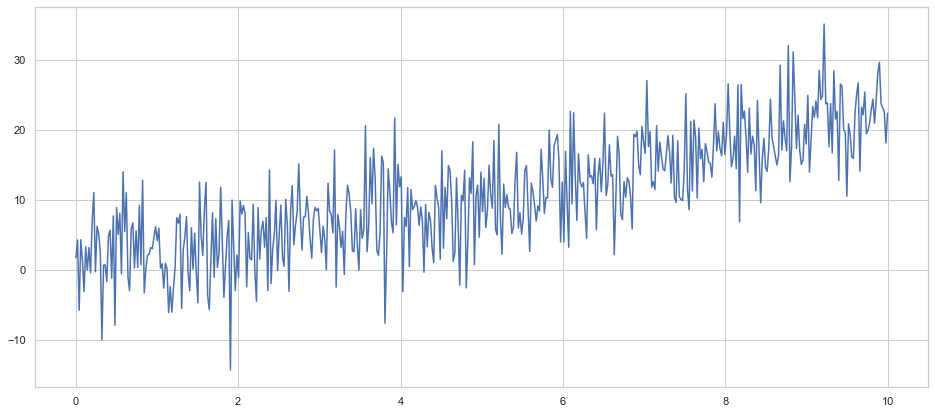

In [6]:
#exponential series to get the trend
ye = np.exp(t**0.5)
#adding normally distributed series in exponential series
y = ys+ye
#plot
plt.figure(figsize=(16,7))
plt.plot(t,y)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


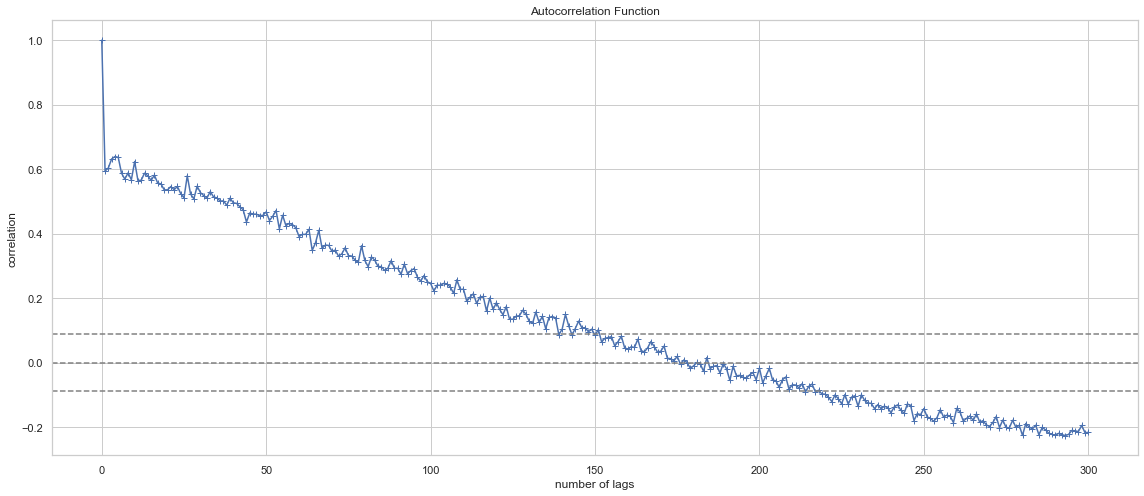

In [7]:
#calling auto correlation function
lag_acf = acf(y, nlags=300)
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

### Summary: 
In the above correlation plot dotted lines represent the confidence band, with center dotted line represents mean and upper and lower dotted line represent boundries based on 95% confidence interval.
Notice that we have good positive correlation with the lags upto 150, this is the point where ACF plot cuts the upper confidence threshold. Although we have good correlation upto 150th lag we cannot use all of them as it will create multi-collinearity problem, thats why we turn to PACF plot to get only the most relevant lags!

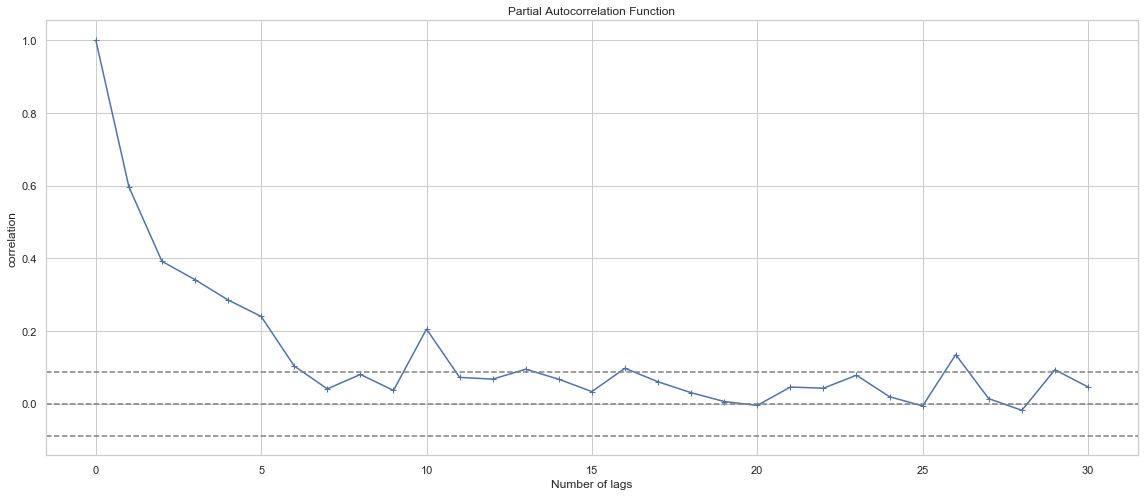

In [8]:
#calling partial correlation function
lag_pacf = pacf(y, nlags=30, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

### Summary:
In the above plot we can see that lags upto 7 have good correlation before the plot first cuts the upper confidence interval. This is our p value i.e the order of our AR process. We can model given AR process using linear combination of first 7 lags.

### 2/ Moving average (MA) process 

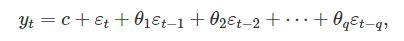

In [10]:
Image('ma.jpeg')

Here ϵt is a white noise.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [13]:
#xma = np.random.randint(1,50000,100)
xma = np.random.normal(0,25,1000)

In [14]:
#lets create a MA series having mean 2 and of order 2
y5 = 2 + xma + 0.8*np.roll(xma,-1) + 0.6*np.roll(xma,-2) #+ 0.6 *np.roll(xma,-3)

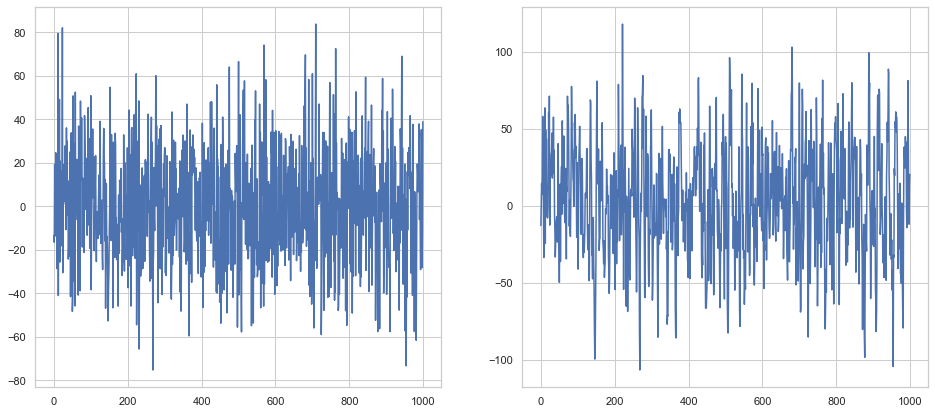

In [15]:
plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(xma)
plt.subplot(122)
plt.plot(y5)

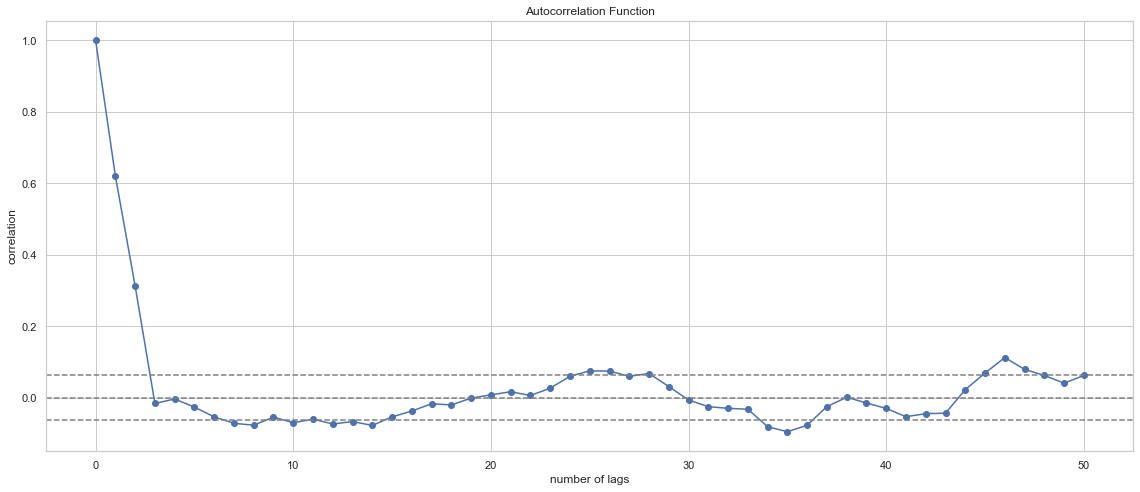

In [16]:
#calling acf function from stattools
lag_acf = acf(y5, nlags=50)
plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

As per above plot we have good correlation upto 2nd lag, this is the lag after which plot cuts the upper confidence interval. Order q of series obtained by the plot is 2, which is correct as we had defined our series with linear combination of residuals upto lag 2.
Thus this proves that ACF correctly predicted order of our MA series.

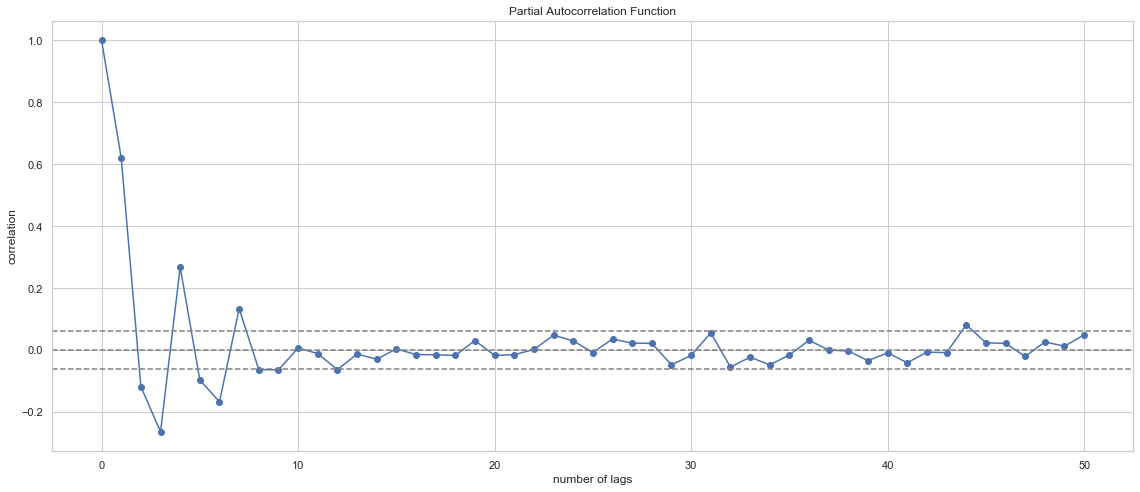

In [17]:
#calling pacf function from stattool
lag_pacf = pacf(y5, nlags=50, method='ols')

#PLOT PACF
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

If we see PACF plot there are many instances where correlation is above upper confidence band as PACF calculates correlations of lags of time series with residuals and our series itself is linear combination of residual and its lagged values.Hence we can get good correlation for near as well as past lags.